# Introduction
----
### Node Embeddings
With the rising popularity of graph technologies and graph-structured data, several embedding techniques have been presented by ML researchers. As the founding unit of a graph strucutre, generating a vector representation of a node in a lower-dimensional vector (or embedding) space such that structural information in the graph are preserved is a crucial step in training ML models on such data, which is referred to as a node embedding.

### Objective of This Notebook
This notebook presents a reworking (alternative implementation) of the GraphSage code libraries. It serves as a practical tutorial on utilizing GraphSage (Sample and Aggregate), a state-of-the-art node embedding framework for graph learning for students on machine learning courses in beginner and intermediate levels. Learning resources [1][2] in the references section offer an introduction to the topic that is highly recommended.


### Inductive Representation Learning on Large Graphs 
The research paper explored in this tutorial,[1] were GraphSage was proposed, discusses the topic of inductive learning, in comparison to transductive learning. Although previous work implemented trandcutive node embeddings, real-applications in different domains and tasks required a more inductive setting in graph learning.[3]  Inductive learning refers to the task of generalizing from a known set of labeled nodes to a larger set of unlabeled nodes, while transductive learning refers to the task of inferring labels for a specific set of unlabeled nodes given a known graph structure and labeled nodes. In other words, inductive learning involves learning a model that can make predictions for nodes that were not seen during training, while transductive learning involves predicting the labels of a specific set of nodes that were not seen during training, hence offering much more scalable predictive opportunities in specific domains such as network analysis, which we also focus on in our tutorial.

### Embedding Approaches before GraphSage Framework
Prior to GraphSage, the majority of embedding approaches were inherently transductive, such as matrix factorisation based embeddings, graph kernels and graph convolutional networks (GCNs). However, as mentioned before, they do not scale well. 

A notable predecessor to GraphSage is Planetoid-I, a semi-supervised learning algorithm introduced by Yang et al. in their 2016 paper "Revisiting Semi-Supervised Learning with Graph Embeddings." It is actually an inductive, embedding-based approach that leverages node embeddings to predict labels for unseen nodes in a graph using a variant of GCNs called Chebyshev spectral filters. Although paving the way for inductive learning using GraphSage, Planetoi-I uses the graph structure as a form of regularization during training using GCN, while GraphSage leverages feature information in order to train a model to produce embeddings for unseen nodes (during inference) through aggragations that we explore in a following section. 

Conceptually, GraphSage is also inspired by the Weisfeiler-Lehman Isomorphism Test, a classic algorithm for testing graph isomorphism.


The intuition behind GraphSage's base algorithm in Fig.1 (below) is that at each iteration, or search depth, nodes aggregate information from their local neighbors, and as this process iterates, nodes incrementally gain more and more information from further reaches of the graph.


### Datasets Used
The default dataset provided in the code repository is Cora, found in the enclosed folder. It consists of 2708 scientific publications, each belonging to a class out of 7 classes (scientific areas). Each publication is associated with a binary label indicating the scientific area to which it belongs. Each publication is described by a bag-of-words representation of its text content, where each word is considered a feature. There are 1433 unique words and 5429 edges in the graph. The dataset is small and easily manageable, making it a popular choice for research.

Additionally, we extend the code to perform a supervised learning task using GraphSage on a well-known example of a social network called the Zachary's Karate Club.  The nodes represent 34 students who were involved in the club and the links represent 78 different interactions between pairs of members outside the club. There are two different types of labels i.e, the two factions. We can use this information to formulate a node classification task.


### Aggregation Architectures Used

The GraphSage paper discusses 3 types of aggregation architectures, to aggregate features from a node's local neighborhood and generate a new embedding for a node. The choice of aggregation architecture depends on the specific task and dataset being used as well based on performance results of the experiments. The architectures are as follows:

- Mean Aggregator: The mean operator, which calculates the elementwise mean of the vector represenation produced in each new step. This aggregator is very similar to the convolutional propagation rule used in the transductive GCN framework (from planetoid-I). By replacing lines 4 and 5 in Algorithm 1  above with a modified version of the mean-based aggregator function, we can derive an inductive variant of the GCN approach. This modified mean-based aggregator is called the convolutional aggregator and is a linear approximation of a localized spectral convolution. Unlike the other proposed aggregators, the convolutional aggregator does not perform a concatenation operation between the node's previous layer representation hk−1 and the aggregated neighborhood vector hk. This concatenation operation can be viewed as a form of "skip connection" between the different layers of the GraphSAGE algorithm, and it leads to significant performance improvements.
- LSTM Aggregator: Compared to the mean aggregator, LSTMs have the advantage of larger expressive capability. This means that LSTM can capture more features and connections in data that mean aggragators, only reliant on computing mean values of node features, can capture. However, LSTM is not permutaion invariant (it is sequential so the order of the input vectors has to be constant) which limits its applications. 
- Max Pooling Aggregator: Max pooling is an operation in neural networks that extracts the most important features from feature maps by selecting the maximum value from a rectangular neighborhood of pixels. In the context of graph neural networks, max pooling is applied to aggregate information across the neighbor set of a node by taking the maximum value of each feature across all the neighbors. This paper focuses on simple single-layer architectures in this work and compares it with other archtectures as shown in Fug 2 (below). Max-pooling has the advantage of being both symmetric (as opposed to LSTM) and trainable.
-------------

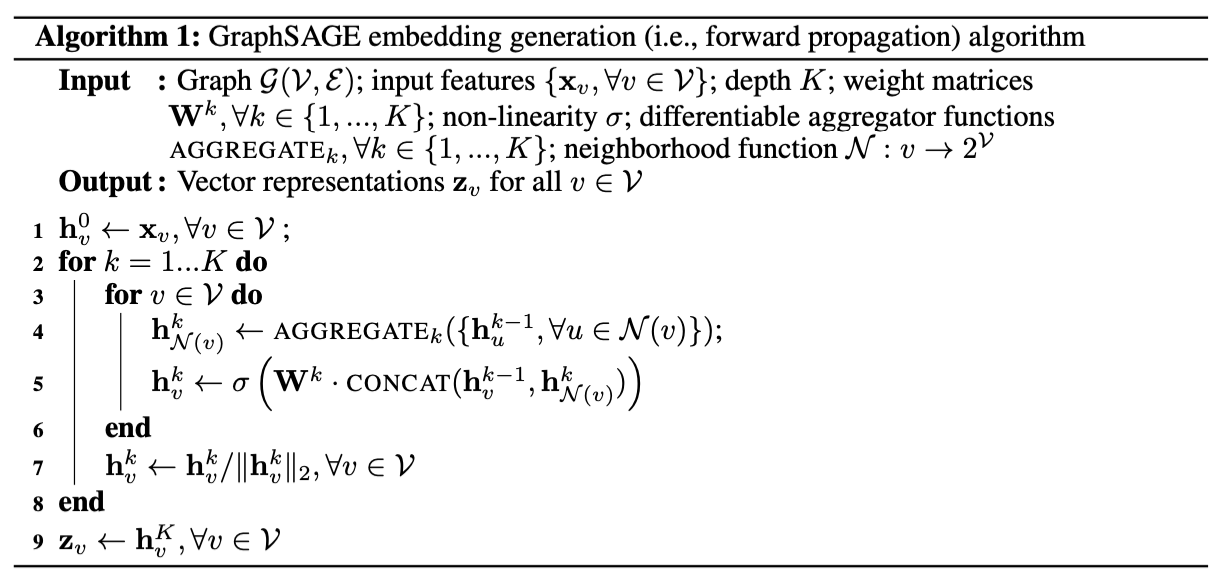 *Figure 1, Base algorithm for GraphSage*

# Code Set-up and Notebook Implementation
----

To run the Cora Example using GraphSage Model, we will use the PyTorch implementation for its clarity and ease of use and add one file to extend its experimentation using existing encoding and aggregation methods used. It can be found in this repository. https://github.com/williamleif/graphsage-simple/

The cloned file structure is as follows: 
-----------
--   grapghsage-simple-master \
-------------- cora \
-------------- pubmed-data \
-------------- readme.md \
-------------- graphsage \
------------------------ _init.py_ \
------------------------ aggragators.py \
------------------------ encoders.py \
------------------------ model.py \
------------------------ __22206549_INST0075report.ipynb__

Where the .ipynb is an additional file created by the author of this tutorial to separate experiments not included in the original work and test the model with different parameters and/or aggragations on different datasets (reworking).

To run the code, first in your terminal:
1. Create a Conda environment. `` conda create -- graphsageone ``
2. Activate it. `` conda activate graphsageone ``
3. Install Pytorch in the environment. `` conda install pytorch torchvision torchaudio -c pytorch ``
4. Ensure the jupyter notebook is running in that environment. Run `` conda install -c anaconda ipykernel `` then ``  python -m ipykernel install --user --name=graphsageone `` then restart your notebook and select the right kernel.
5. Install scikit-learn. `` conda install scikit-learn ``
6. To test that all the necessary libraries are installed and imported, run the cora example (below). The requirements here https://github.com/williamleif/GraphSAGE/blob/master/requirements.txt are the full requirements in case there are any platform/os based difficulties running the code.
7. Install matplotlib ``conda install -c conda-forge matplotlib ``

# 1. Running the default example provided:
---
The default dataset provided with the original code files is the Cora dataset as discussed above. The following code block import the necessary libraries and runs the example and outputs the loss values (represented by tensors) during training for each iteration. The loss value is a measure of how well the model is fitting the training data. The goal is to minimize the loss function, which means that the model is getting better at predicting the target variable.

The loss values decrease as the number of iterations increases. This is a good sign, as it means that the model is improving. The validation F1 score is also provided, which is a measure of how well the model is generalizing to new data that it hasn't seen before. In this case, the validation F1 score is 0.83, which is quite good.

Finally, the average batch time is also provided, which gives an idea of how long each batch of data takes to process during training. This can be useful for optimizing the training process by adjusting the batch size or other parameters.

These results suggest that the GraphSAGE model is performing well on the Cora dataset using PyTorch implementation.





In [4]:
# Import libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import random
import time
import networkx as nx
from collections import defaultdict
from sklearn.metrics import f1_score
from graphsage.encoders import Encoder
from graphsage.aggregators import MeanAggregator
from graphsage.model import *

# Run the Cora Dataset
run_cora()


<class 'numpy.ndarray'>
<class 'numpy.ndarray'> [[0]
 [1]
 [2]
 ...
 [5]
 [6]
 [0]]
<class 'collections.defaultdict'>
0 tensor(1.9404)
1 tensor(1.9218)
2 tensor(1.8988)
3 tensor(1.8724)
4 tensor(1.8330)


/Users/Esraadandash/Desktop/UCL/ML Methods/CW/REPORT/graphsage-simple-master/graphsage/model.py:28: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  init.xavier_uniform(self.weight)


5 tensor(1.7921)
6 tensor(1.7629)
7 tensor(1.7311)
8 tensor(1.6808)
9 tensor(1.6318)
10 tensor(1.5398)
11 tensor(1.5155)
12 tensor(1.4477)
13 tensor(1.4281)
14 tensor(1.3439)
15 tensor(1.2583)
16 tensor(1.1972)
17 tensor(1.1152)
18 tensor(0.9557)
19 tensor(0.8943)
20 tensor(0.8643)
21 tensor(0.8417)
22 tensor(0.7490)
23 tensor(0.7070)
24 tensor(0.6869)
25 tensor(0.7136)
26 tensor(0.6589)
27 tensor(0.6689)
28 tensor(0.8337)
29 tensor(0.8977)
30 tensor(1.1044)
31 tensor(0.6067)
32 tensor(0.5134)
33 tensor(0.4741)
34 tensor(0.4472)
35 tensor(0.4170)
36 tensor(0.4301)
37 tensor(0.4972)
38 tensor(0.4812)
39 tensor(0.5389)
40 tensor(0.4684)
41 tensor(0.3840)
42 tensor(0.3356)
43 tensor(0.3931)
44 tensor(0.3791)
45 tensor(0.3357)
46 tensor(0.3166)
47 tensor(0.2963)
48 tensor(0.3186)
49 tensor(0.3572)
50 tensor(0.3132)
51 tensor(0.3616)
52 tensor(0.3173)
53 tensor(0.3860)
54 tensor(0.2760)
55 tensor(0.3359)
56 tensor(0.3374)
57 tensor(0.2984)
58 tensor(0.3259)
59 tensor(0.2754)
60 tensor(0.299

# 2. Loading the Karate Club Data and running a graphSage implementation on them.
---
This following 2 code blocks trains a two-layer GraphSAGE model with mean aggregator and use it for node classification on the Karate Club dataset. It follows a simlar algorithm to the one used for cora but with less number of iterations and batches to suit the smaller number of datapoints. The optimizer used is stochastic gradient descent with a learning rate of 0.7. Finally, it prints the loss and the time taken for each batch during training. The loss is significantly decreasing when running the example which suggests that the GraphSAGE model is performing well on the Cora dataset using PyTorch implementation.

In [2]:
# Load the Karate Club network for a quick overview of nodes and edges
G = nx.karate_club_graph()

# Print the number of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Print the nodes
print("Nodes:")
for node in G.nodes():
    print(node)

# Print the edges
print("Edges:")
for edge in G.edges():
    print(edge)

Number of nodes: 34
Number of edges: 78
Nodes:
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
Edges:
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 17)
(0, 19)
(0, 21)
(0, 31)
(1, 2)
(1, 3)
(1, 7)
(1, 13)
(1, 17)
(1, 19)
(1, 21)
(1, 30)
(2, 3)
(2, 7)
(2, 8)
(2, 9)
(2, 13)
(2, 27)
(2, 28)
(2, 32)
(3, 7)
(3, 12)
(3, 13)
(4, 6)
(4, 10)
(5, 6)
(5, 10)
(5, 16)
(6, 16)
(8, 30)
(8, 32)
(8, 33)
(9, 33)
(13, 33)
(14, 32)
(14, 33)
(15, 32)
(15, 33)
(18, 32)
(18, 33)
(19, 33)
(20, 32)
(20, 33)
(22, 32)
(22, 33)
(23, 25)
(23, 27)
(23, 29)
(23, 32)
(23, 33)
(24, 25)
(24, 27)
(24, 31)
(25, 31)
(26, 29)
(26, 33)
(27, 33)
(28, 31)
(28, 33)
(29, 32)
(29, 33)
(30, 32)
(30, 33)
(31, 32)
(31, 33)
(32, 33)


In [11]:
# Load Zachary Karate Club dataset
def load_kclub():
    """
    We first load the Karate Club data and then randomly shuffle the indices 
    of the nodes using np.random.permutation. We then split the shuffled indices into three sets: 
    the first 20% for testing, the next 10% for validation, and the remaining 70% for training. 
    We store the indices of the nodes in each set in the variables test, val, and train, respectively. 
    We can use these sets of indices to extract the corresponding rows from the features and labels 
    matrices for each set.
    
    """
    G = nx.karate_club_graph()
    num_nodes = G.number_of_nodes()
    num_feats = num_nodes
    feat_data = np.eye(num_nodes)
    labels = np.zeros((num_nodes, 1), dtype=np.int64)
    node_map = {}
    label_map = {}
    adj_lists = defaultdict(set)
    for i, (node, data) in enumerate(G.nodes(data=True)):
        node_map[node] = i
        labels[i] = data['club'] == 'Officer'

    
    for edge in G.edges():
        paper1 = node_map[edge[0]]
        paper2 = node_map[edge[1]]
        adj_lists[paper1].add(paper2)
        adj_lists[paper2].add(paper1)

    return feat_data, labels, adj_lists

# Run GraphSAGE on Zachary Karate Club dataset for node classification
def run_kclub():
    # Set random seeds for reproducibility
    np.random.seed(1)
    random.seed(1)
    
    # Load data  from the laod function above and convert to PyTorch tensor
    num_nodes = 34
    feat_data, labels, adj_lists = load_kclub()
    features = nn.Embedding(num_nodes, 34)
    features.weight = nn.Parameter(torch.FloatTensor(feat_data), requires_grad=False)

    # Define aggregators and encoders
    agg1 = MeanAggregator(features, cuda=False)
    enc1 = Encoder(features, 34, 16, adj_lists, agg1, gcn=False, cuda=False)
    agg2 = MeanAggregator(lambda nodes : enc1(nodes).t(), cuda=False)
    enc2 = Encoder(lambda nodes : enc1(nodes).t(), enc1.embed_dim, 16, adj_lists, agg2,
            base_model=enc1, gcn=False, cuda=False)
    enc1.num_samples = 5
    enc2.num_samples = 5
    
    # Define GraphSAGE model with 2 classes in the dataset
    graphsage = SupervisedGraphSage(2, enc2)
    
    # Split data into train, validation, and test sets
    rand_indices = np.random.permutation(num_nodes)
    test = rand_indices[:int(0.2*num_nodes)]
    val = rand_indices[int(0.2*num_nodes):int(0.3*num_nodes)]
    train = list(rand_indices[int(0.3*num_nodes):])
    
    # Define optimizer and track training time
    optimizer = torch.optim.SGD(filter(lambda p : p.requires_grad, graphsage.parameters()), lr=0.7)
    times = []
    for batch in range(50):
        batch_nodes = train[:10]
        random.shuffle(train)
        
        # Compute loss and backpropagate
        start_time = time.time()
        optimizer.zero_grad()
        loss = graphsage.loss(batch_nodes, 
                Variable(torch.LongTensor(labels[np.array(batch_nodes).astype(np.int64)])))
        loss.backward()
        optimizer.step()
        end_time = time.time()
        times.append(end_time-start_time)
        print(batch, loss.data)

    val_output = graphsage.forward(val) 
    print("Validation F1:", f1_score(labels[val], val_output.data.numpy().argmax(axis=1), average="micro"))
    print("Average batch time:", np.mean(times))

# Run the exmple 
run_kclub()

0 tensor(0.6869)
1 tensor(0.6657)
2 tensor(0.6296)
3 tensor(0.5930)
4 tensor(0.5332)
5 tensor(0.4818)
6 tensor(0.4734)
7 tensor(0.3994)
8 tensor(0.3747)
9 tensor(0.3702)
10 tensor(0.3996)
11 tensor(0.3153)
12 tensor(0.2343)
13 tensor(0.1858)
14 tensor(0.2291)
15 tensor(0.1594)
16 tensor(0.1290)
17 tensor(0.1185)
18 tensor(0.0907)
19 tensor(0.0789)
20 tensor(0.0778)
21 tensor(0.0469)
22 tensor(0.0344)
23 tensor(0.0616)
24 tensor(0.0376)
25 tensor(0.0651)
26 tensor(0.0282)
27 tensor(0.0247)
28 tensor(0.0425)
29 tensor(0.0339)
30 tensor(0.0258)
31 tensor(0.0210)
32 tensor(0.0122)
33 tensor(0.0240)
34 tensor(0.0113)
35 tensor(0.0163)
36 tensor(0.0121)
37 tensor(0.0123)
38 tensor(0.0137)
39 tensor(0.0135)
40 tensor(0.0117)
41 tensor(0.0124)
42 tensor(0.0078)
43 tensor(0.0118)
44 tensor(0.0091)
45 tensor(0.0124)
46 tensor(0.0068)
47 tensor(0.0067)
48 tensor(0.0095)
49 tensor(0.0072)
Validation F1: 1.0
Average batch time: 0.0008696603775024414


# Example Domains
-----
There are 3 main examples discussed in the paper with different aggragators also compared in performance as shown in Table 1 (below):
1. Predicting paper subject categories on a citation dataset derived from the Thomson Reuters Web of Science Core Collection. This dataset contains 302,424 nodes from six biology-related fields for the years 2000-2005, with node labels corresponding to the six different field labels. The average node degree is 9.15. The algorithms are trained on the 2000-2004 data and tested on the 2005 data (with 30% used for validation). Node degrees and paper abstracts processed using Arora et al.'s sentence embedding approach, with 300-dimensional word vectors trained using GenSim word2vec, are used as features.
2. Predicting the subreddit community of different Reddit posts. We built a graph dataset from posts made in September 2014 and sampled 50 large communities. The node label is the subreddit a post belongs to. We use a post-to-post graph connecting posts if the same user comments on both. We train on the first 20 days and test on the remaining days (with 30% used for validation). We use off-the-shelf 300-dimensional GloVe CommonCrawl word vectors for features, including the post's title and comments' embeddings, the post's score, and the number of comments.
3. Anlaysing protein roles—in terms of their cellular functions from gene ontology—in various protein-protein interaction (PPI) graphs, with each graph corresponding to a different human tissue.

Although GraphSage can be applied to any domain where there is a graph structure (that can expand significantly) and the task involves node classification or graph representation learning, it is predominantly used in social networks, bioinformatics, recommendation systems, traffic analysis and cybersecurity tasks.

# Summary 
----
## Model Comparison

The authors of this research article present their experimental set-up and the benchmarks they use to evaluate the performance of their proposed GraphSAGE algorithm against four baselines. The baselines include a random classifier, a logistic regression feature-based classifier that does not consider graph structure, the DeepWalk algorithm as a representative factorization-based approach, and a concatenation of the raw features and DeepWalk embeddings. They also compare four variants of GraphSAGE that use different aggregator functions.

They use rectified linear units as the non-linearity and set K=2 with neighborhood sample sizes S1=25 and S2=10 for all the GraphSAGE variants.

For the Reddit and citation datasets, they use “online” training for DeepWalk, as described in Perozzi et al., where they run a new round of SGD optimization to embed the new test nodes before making predictions. However, in the multi-graph setting, they cannot apply DeepWalk, since the embedding spaces generated by running the DeepWalk algorithm on different disjoint graphs can be arbitrarily rotated with respect to each other.

All the models were implemented in TensorFlow with the Adam optimizer (except DeepWalk, which performed better with the vanilla gradient descent optimizer). They designed their experiments with two main goals: to verify the improvement of GraphSAGE over the baseline approaches and to provide a rigorous comparison of the different GraphSAGE aggregator architectures.

In order to provide a fair comparison, all models share an identical implementation of their minibatch iterators, loss function, and neighborhood sampler (when applicable). Moreover, to guard against unintentional “hyperparameter hacking” in the comparisons between GraphSAGE aggregators, they sweep over the same set of hyperparameters for all GraphSAGE variants, choosing the best setting for each variant according to performance on a validation set. The set of possible hyperparameter values was determined on early validation tests using subsets of the citation and Reddit data that they then discarded from their analyses. 
Overall, the authors present a rigorous and fair experimental set-up to evaluate the performance of GraphSAGE and its variants against established baselines, with a focus on identifying the strengths and weaknesses of different aggregator functions. Their approach allows for a meaningful comparison of the different methods and provides insights into the effectiveness of GraphSAGE in various contexts.

Table 1 below shows the prediction results for the three datasets (micro-averaged F1 scores). The results (in bold) show that max-pool is the overall best aggragator in performance followed closedly by LSTM.

## Future Work

GraphSAGE can be extended beyond the work mentioned in the inductive representation papers and the code by applying it to other types of graphs or by experimenting with different model architectures, training objectives, or node feature representations. For example: 

- Multi-Relational GraphSage: This approach extends GraphSAGE to support multiple types of edges in a graph, each with its own set of features, allowing it to learn richer representations of entities in the graph.

- Temporal GraphSAGE: [6] A temporal graph is, informally speaking, a graph that changes with time. This approach extends GraphSAGE to support dynamic graphs, where the structure of the graph changes over time. It learns representations of entities in the graph that capture their temporal evolution. (reference)

- GraphSAGE for Graph Classification: In addition to inductive representation learning, GraphSAGE has been extended to support graph classification tasks, where the goal is to predict a label for the entire graph. This is useful in applications such as molecule classification and social network analysis.

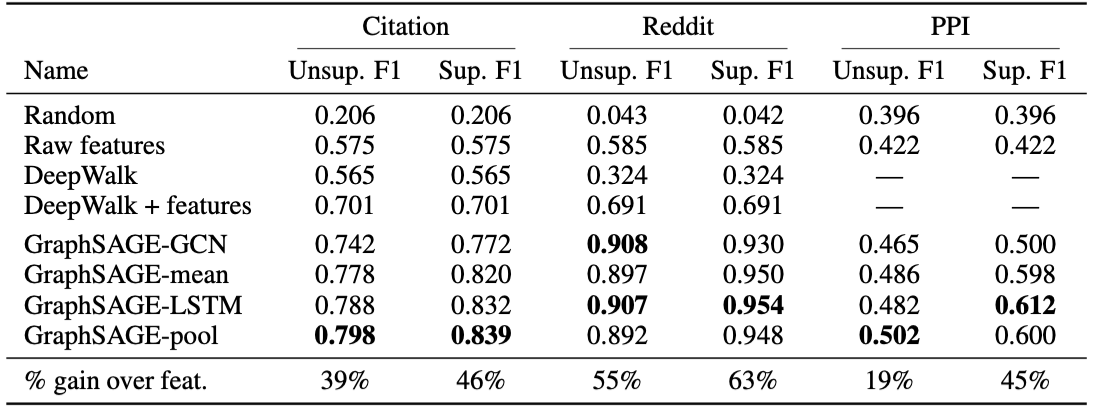 *Table 1, results of using graphsage with different classifers and aggregators*

# References
-----

[1] Hamilton, W.L., Ying, R. and Leskovec, J. (2018) Inductive representation learning on large graphs, arXiv.org. Available at: https://arxiv.org/abs/1706.02216 (Accessed: 12 May 2023). \

[2] Stanford CS224W: Machine learning with Graphs | 2021 | lecture 1.1 - why graphs (2021) YouTube. Available at: https://www.youtube.com/watch?v=JAB_plj2rbA&amp;list=PLoROMvodv4rPLKxIpqhjhPgdQy7imNkDn (Accessed: 12 May 2023). \

[3] Mallawaarachchi, V. (2020) Inductive vs. Transductive Learning, Medium. Available at: https://towardsdatascience.com/inductive-vs-transductive-learning-e608e786f7d (Accessed: 12 May 2023). \

[4] Snap for C++: Stanford Network Analysis Platform (no date) SNAP. Available at: http://snap.stanford.edu/ (Accessed: 12 May 2023).  \

[5] Yang, Z., Cohen, W.W. and Salakhutdinov, R. (2016) Revisiting semi-supervised learning with Graph Embeddings, arXiv.org. Available at: https://arxiv.org/abs/1603.08861 (Accessed: 12 May 2023). \

[6] Huang, S. (2023) Temporal Graph Learning in 2023, Medium. Available at: https://towardsdatascience.com/temporal-graph-learning-in-2023-d28d1640dbf2 (Accessed: 12 May 2023). 

word count: 1987. (Excl References)